<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

In [533]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [534]:
np.set_printoptions(suppress=True, precision=4)

In [535]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [536]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [537]:
npR

array([[-1.1957, -1.4622, -1.3961, -0.721 , -0.2844],
       [ 0.    , -0.575 , -1.0761, -0.7214, -0.6746],
       [ 0.    ,  0.    ,  0.4838, -0.1243,  0.2187],
       [ 0.    ,  0.    ,  0.    ,  0.1706, -0.3336],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.0844]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [538]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)

    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v -= R[i, j] * Q[:, i]

        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]
        
    return Q, R

In [539]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m, n], dtype=np.float64)
    R = np.zeros([n, n], dtype=np.float64)

    for j in range(n):
        v = A[:, j].copy()
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], v)
            v -= R[i, j] * Q[:, i]

        R[j, j] = np.linalg.norm(v)
        
        if R[j, j] != 0:
            Q[:, j] = v / R[j, j]

    return Q, R

In [540]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [541]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [542]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [543]:
def mgs(A):
    V = A.copy() #I DONT NEED TO USE THIS ONE
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)

    for j in range(n):
        v = A[:, j].copy()
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], v)
            v -= R[i, j] * Q[:, i]

        R[j, j] = np.linalg.norm(v)
        
        if R[j, j] != 0:
            Q[:, j] = v / R[j, j]
    return Q, R

In [544]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [545]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [546]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [547]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [548]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

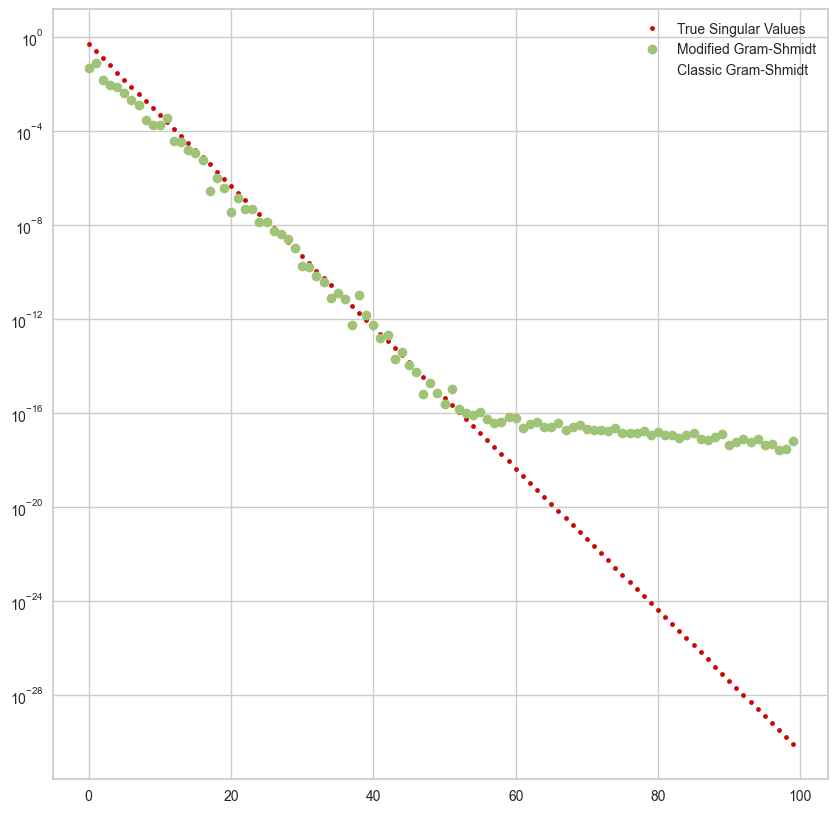

In [549]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [550]:
def qr_algorithm(A, num_iterations=100):
    for i in range(num_iterations):
        Q, R = np.linalg.qr(A)
        #we can use our  def cgs(A): function
        A = R @ Q

        # Print eigenvalues for specific iterations
        if i + 1 in [1, 5, 10, 20, 100]:
            eigenvalues = np.diag(A)
            print(f"Iteration {i + 1} - Eigenvalues: {eigenvalues}")

    return np.diag(A)




In [551]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0],'\n')

eigenvalues = qr_algorithm(A, num_iterations=100)
print("\n --- QR Algorithm ---")
print(eigenvalues)


The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ] 

Iteration 1 - Eigenvalues: [2. 2. 0. 3.]
Iteration 5 - Eigenvalues: [ 2.7929  1.4541 -0.247   3.    ]
Iteration 10 - Eigenvalues: [ 2.8019  1.4451 -0.247   3.    ]
Iteration 20 - Eigenvalues: [ 2.8019  1.445  -0.247   3.    ]
Iteration 100 - Eigenvalues: [ 2.8019  1.445  -0.247   3.    ]

 --- QR Algorithm ---
[ 2.8019  1.445  -0.247   3.    ]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

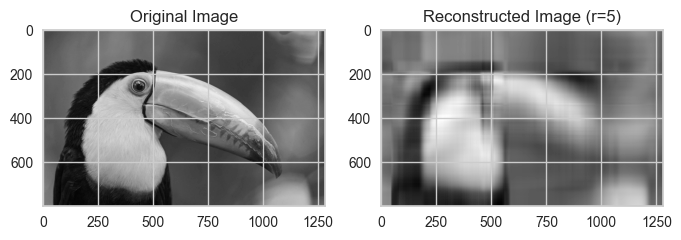

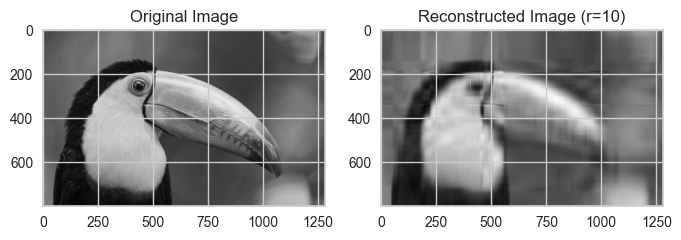

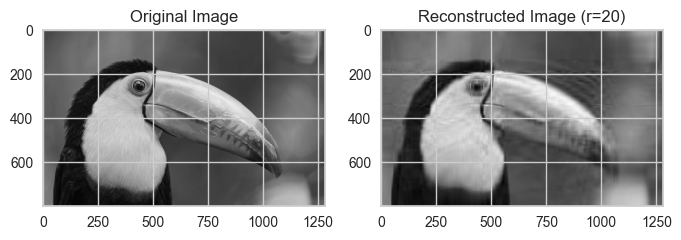

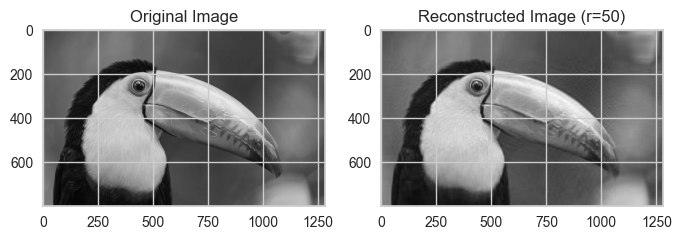

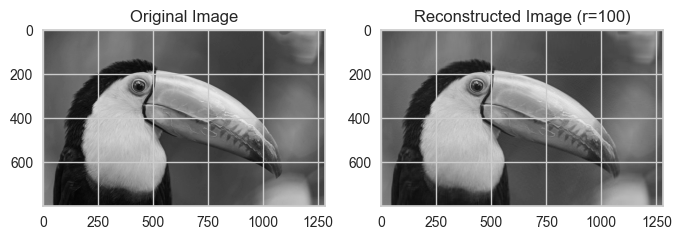

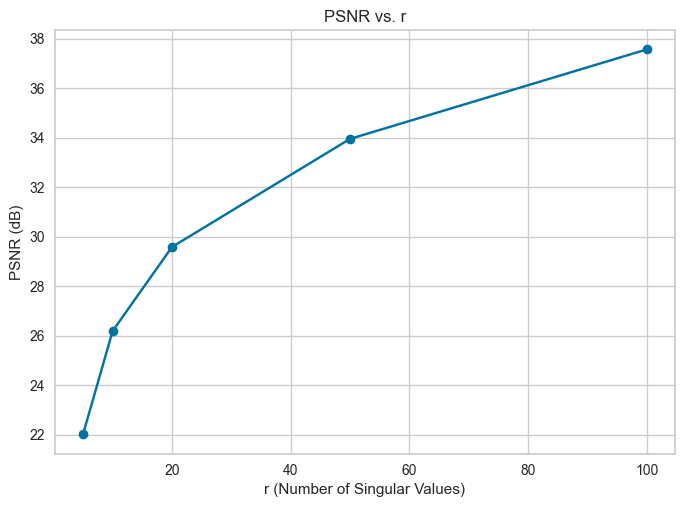

In [552]:
def compress_image(image_path, r_values):
    # Load the image as a grayscale image
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Ensure that the image has at least two dimensions
    if len(original_image.shape) == 2:
        # Perform SVD
        U, S, Vt = np.linalg.svd(original_image, full_matrices=False)

        # Initialize an array to store PSNR values
        psnr_values = []

        # Reconstruct the image for different values of r
        for r in r_values:
            # Truncate U, S, and Vt to keep only r components
            Ur = U[:, :r]
            Sr = np.diag(S[:r])
            Vtr = Vt[:r, :]

            # Reconstruct the compressed image
            compressed_image = np.dot(Ur, np.dot(Sr, Vtr))

            # Calculate PSNR
            mse = np.mean((original_image - compressed_image) ** 2)
            psnr = 20 * np.log10(255 / np.sqrt(mse))
            psnr_values.append(psnr)

            # Display the reconstructed image for the  r=5 value
            if r == r_values[0]:
                plt.subplot(1, 2, 1)
                plt.imshow(original_image, cmap='gray')
                plt.title('Original Image', fontsize=12)

                plt.subplot(1, 2, 2)
                plt.imshow(compressed_image, cmap='gray')
                plt.title(f'Reconstructed Image (r={r})', fontsize=12)
                plt.show()
            # Display the reconstructed image for the  r=10 value
            if r == r_values[1]:
                plt.subplot(1, 2, 1)
                plt.imshow(original_image, cmap='gray')
                plt.title('Original Image', fontsize=12)

                plt.subplot(1, 2, 2)
                plt.imshow(compressed_image, cmap='gray')
                plt.title(f'Reconstructed Image (r={r})', fontsize=12)
                plt.show()
            # Display the reconstructed image for the  r=20 value
            if r == r_values[2]:
                plt.subplot(1, 2, 1)
                plt.imshow(original_image, cmap='gray')
                plt.title('Original Image', fontsize=12)

                plt.subplot(1, 2, 2)
                plt.imshow(compressed_image, cmap='gray')
                plt.title(f'Reconstructed Image (r={r})', fontsize=12)
                plt.show()
            # Display the reconstructed image for the  r=50 value
            if r == r_values[3]:
                plt.subplot(1, 2, 1)
                plt.imshow(original_image, cmap='gray')
                plt.title('Original Image', fontsize=12)

                plt.subplot(1, 2, 2)
                plt.imshow(compressed_image, cmap='gray')
                plt.title(f'Reconstructed Image (r={r})', fontsize=12)
                plt.show()
            # Display the reconstructed image for the  r=100 value
            if r == r_values[4]:
                plt.subplot(1, 2, 1)
                plt.imshow(original_image, cmap='gray')
                plt.title('Original Image', fontsize=12)

                plt.subplot(1, 2, 2)
                plt.imshow(compressed_image, cmap='gray')
                plt.title(f'Reconstructed Image (r={r})', fontsize=12)
                plt.show()

        # Plot the PSNR diagram
        plt.plot(r_values, psnr_values, marker='o')
        plt.title('PSNR vs. r')
        plt.xlabel('r (Number of Singular Values)')
        plt.ylabel('PSNR (dB)')
        plt.grid(True)
        plt.show()
    else:
        print("The input image does not have at least two dimensions.")

# Test the function with the provided image 'pic.jpg' and different values of r
image_path = 'pic.jpg'
r_values = [5, 10, 20, 50, 100]
compress_image(image_path, r_values)


###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


In [ ]:
# Load the original image
original_image = cv2.imread('pic.jpg', cv2.IMREAD_GRAYSCALE)

# Function to add salt and pepper noise to an image
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size

    # Add salt noise
    salt_pixels = int(total_pixels * salt_prob)
    salt_coords = [np.random.randint(0, high=i, size=salt_pixels) for i in image.shape]
    salt_coords = tuple(np.clip(coord, 0, image.shape[dim] - 1) for dim, coord in enumerate(salt_coords))
    noisy_image[salt_coords] = 255

    # Add pepper noise
    pepper_pixels = int(total_pixels * pepper_prob)
    pepper_coords = [np.random.randint(0, high=i, size=pepper_pixels) for i in image.shape]
    pepper_coords = tuple(np.clip(coord, 0, image.shape[dim] - 1) for dim, coord in enumerate(pepper_coords))
    noisy_image[pepper_coords] = 0

    return noisy_image


# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean, std_dev):
    noise = np.random.normal(mean, std_dev, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255)  # Ensure pixel values are in the valid range
    noisy_image = noisy_image.astype(np.uint8)
    return noisy_image

# Add salt and pepper noise to the original image
salt_pepper_noisy_image = add_salt_and_pepper_noise(original_image, salt_prob=0.02, pepper_prob=0.02)

# Add Gaussian noise to the original image
gaussian_noisy_image = add_gaussian_noise(original_image, mean=0, std_dev=20)

# Perform SVD-based noise reduction
def svd_noise_reduction(image, r):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    S[r:] = 0
    reduced_image = np.dot(U, np.dot(np.diag(S), Vt))
    return reduced_image

# Evaluate different ranks (r) for SVD and calculate PSNR for salt and pepper noise
r_values = range(1, 101)  # Adjust the range as needed
psnr_salt_pepper = []

for r in r_values:
    reduced_image = svd_noise_reduction(salt_pepper_noisy_image, r)
    psnr = calculate_psnr(original_image, reduced_image)
    psnr_salt_pepper.append(psnr)

# Calculate PSNR for Gaussian noise
psnr_gaussian = []
for r in r_values:
    reduced_image = svd_noise_reduction(gaussian_noisy_image, r)
    psnr = calculate_psnr(original_image, reduced_image)
    psnr_gaussian.append(psnr)

# Plot the PSNR diagrams
plt.figure(figsize=(10, 6))
plt.plot(r_values, psnr_salt_pepper, label='Salt and Pepper Noise')
plt.plot(r_values, psnr_gaussian, label='Gaussian Noise')
plt.title('PSNR vs. Rank (r) for Different Noises')
plt.xlabel('Rank (r)')
plt.ylabel('PSNR (dB)')
plt.legend()
plt.show()


In [ ]:
average_psnr_salt_pepper = np.mean(psnr_salt_pepper)
average_psnr_gaussian = np.mean(psnr_gaussian)

print("Average PSNR for Salt and Pepper Noise:", average_psnr_salt_pepper)
print("Average PSNR for Gaussian Noise:", average_psnr_gaussian)

if average_psnr_salt_pepper > average_psnr_gaussian:
    print("Salt and Pepper Noise is more effectively reduced.")
else:
    print("result:     Gaussian Noise is more effectively reduced.")

Average PSNR for Salt and Pepper Noise: 25.526827731780728
Average PSNR for Gaussian Noise: 27.780995294882004
result:     Gaussian Noise is more effectively reduced.


###  result

The PSNR values indicate the quality of the reconstructed images after applying SVD-based noise reduction for different ranks (r).
Typically, a higher PSNR value corresponds to better image quality, as it implies less distortion or noise in the reconstructed image. Therefore,after running the code and plotting the PSNR diagrams,  as you see for  Gaussian nise results in higher PSNR values across various ranks. it suggests that the Gaussian nise is more effectively reduced by the SVD-based method.

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

### Import Dataset

In [ ]:
Datapoint = pd.read_csv('Datapoint.csv')

### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

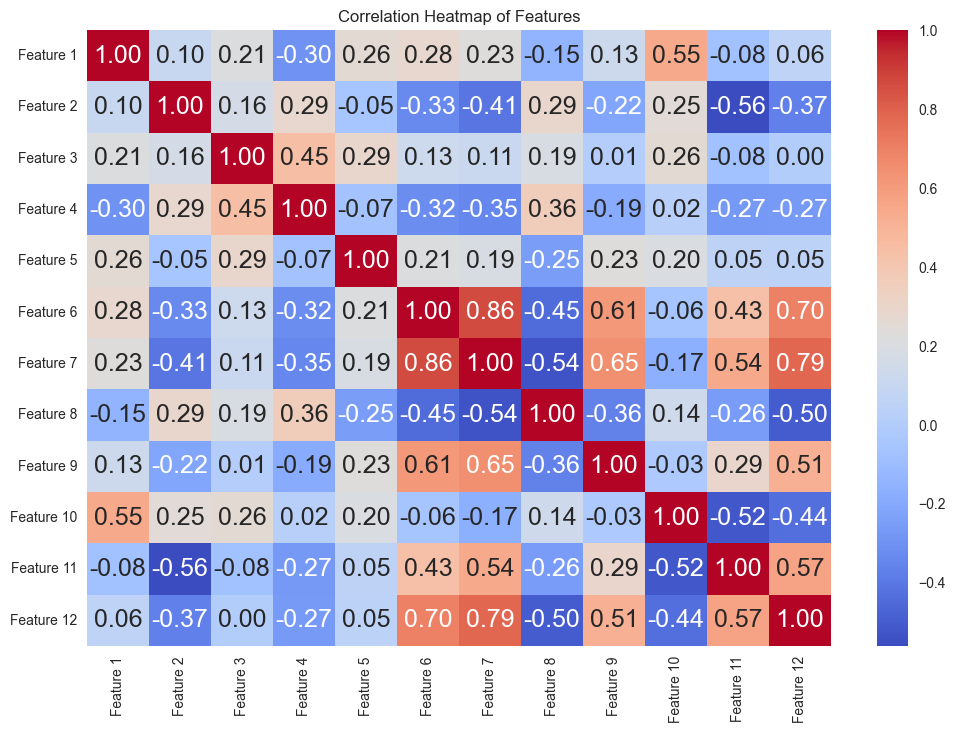

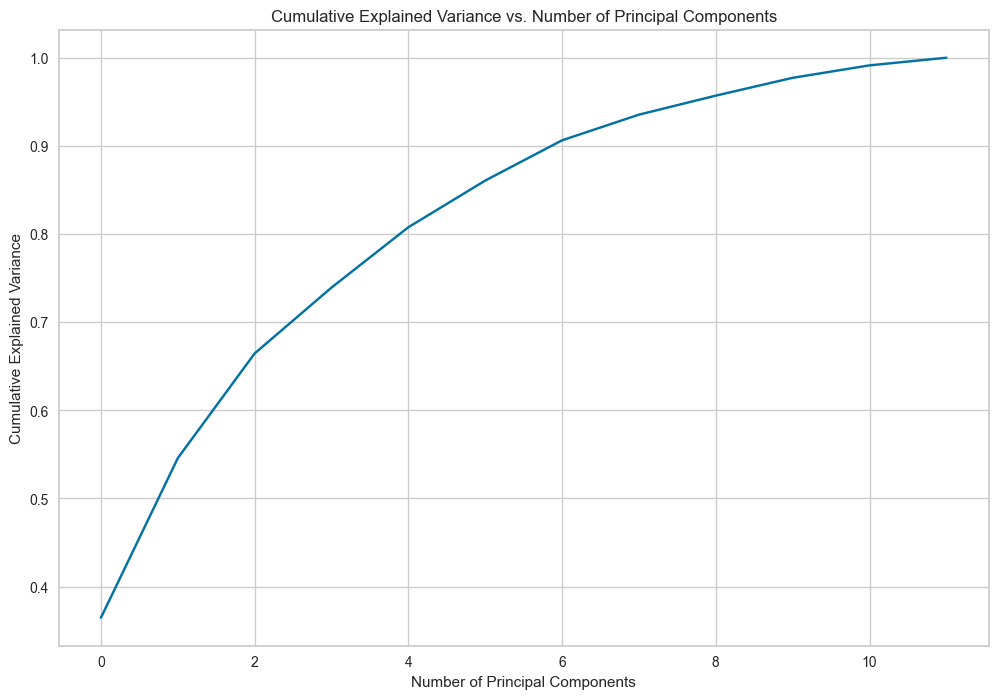

In [ ]:
# Extract features and target variable (if applicable)
# Assuming that the last column is the target variable and the rest are features
X = Datapoint.iloc[:, :-1].values  # Features
y = Datapoint.iloc[:, -1].values    # Target variable (if applicable)

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Plot the correlation heatmap of features
plt.figure(figsize=(12, 8))
sns.heatmap(np.corrcoef(X_standardized, rowvar=False), annot=True, cmap='coolwarm', fmt='.2f',
            xticklabels=[f'Feature {i+1}' for i in range(X_standardized.shape[1])],
            yticklabels=[f'Feature {i+1}' for i in range(X_standardized.shape[1])])
plt.title('Correlation Heatmap of Features')
plt.show()

# Plot the explained variance ratio
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()


### result
To determine the optimal number of principal components that capture high variance, we typically examine the cumulative explained variance plot generated by PCA. In this plot, the x-axis represents the number of principal components, and the y-axis represents the cumulative explained variance.

Base on Cumulative Explained Variance Plot:

 You can observe that the first 10 principal components capture more than 95% of the variance.So we might consider using the first 10 principal components for further analysis, as they provide a concise representation of the dataset while retaining a high percentage of the original variance.

###  Data Preprocessing

In [ ]:
Datapoint.head()

,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

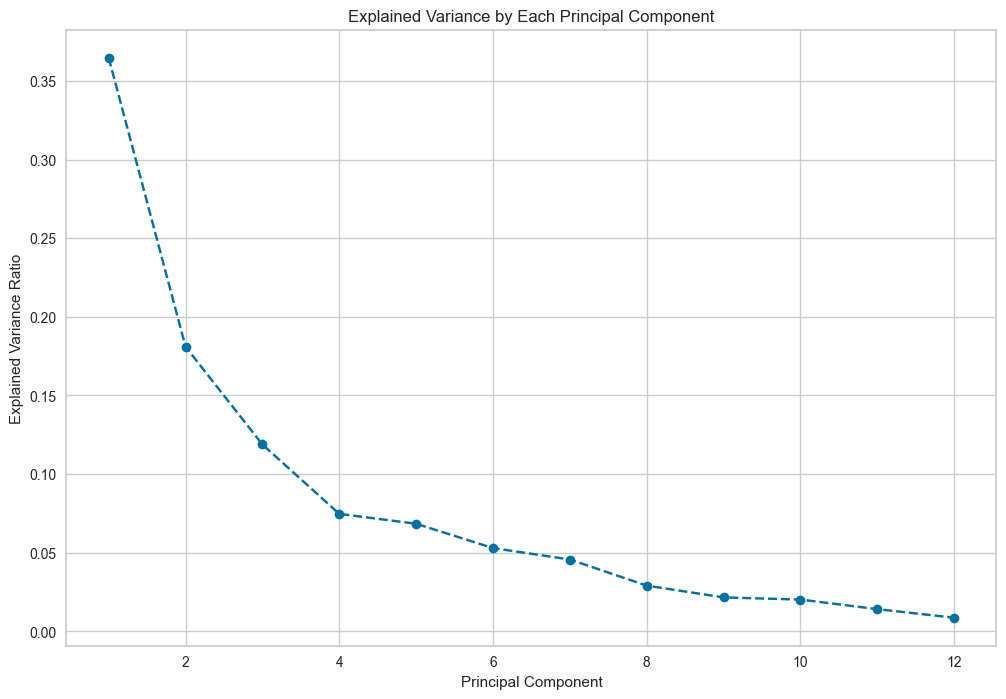

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


def custom_pca_with_standard_scaler(data, n_components):
    # Step 1: Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Step 2: Compute the covariance matrix
    covariance_matrix = np.cov(data_scaled, rowvar=False)
    
    # Step 3: Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 4: Sort eigenvalues in descending order and choose the top n_components
    idx = eigenvalues.argsort()[::-1]
    top_eigenvalues = eigenvalues[idx][:n_components]
    top_eigenvectors = eigenvectors[:, idx][:, :n_components]
    
    # Step 5: Project the data onto the new feature space
    projected_data = np.dot(data_scaled, top_eigenvectors)
    
    # Step 6: Calculate the explained variance
    total_variance = np.sum(eigenvalues)
    explained_variance = np.sum(top_eigenvalues)
    explained_variance_ratio = top_eigenvalues / total_variance
    
    return projected_data, explained_variance_ratio


# Call the custom function
projected_data, explained_variance_ratio = custom_pca_with_standard_scaler(X_standardized,12)

# Plot the explained variance by each component
plt.figure(figsize=(12, 8))
plt.plot(range(1, projected_data.shape[1] + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()



in order to check the out put:

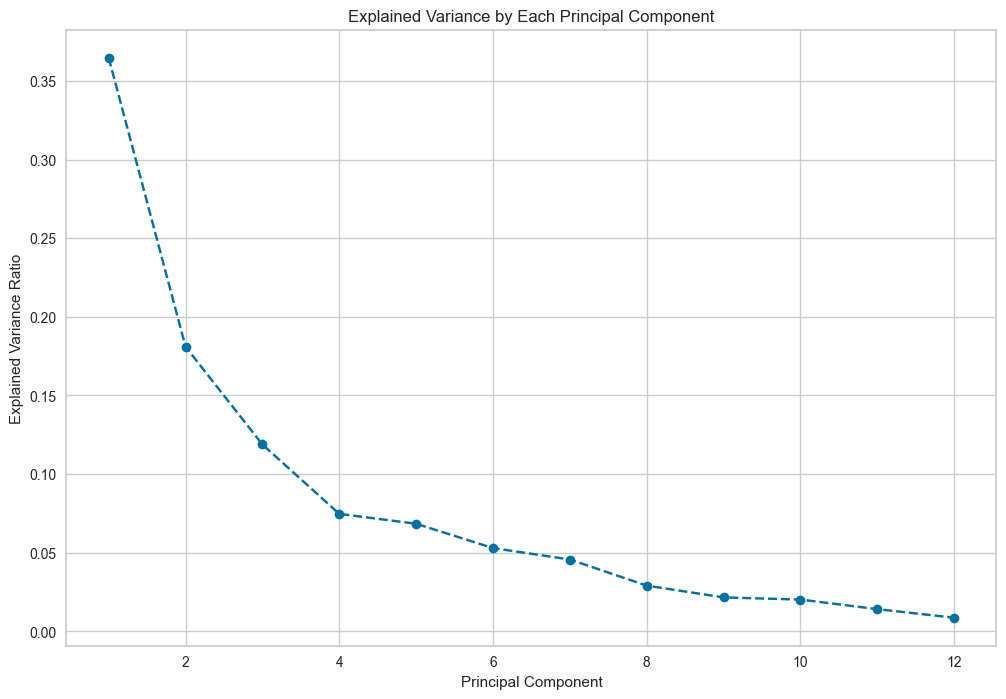

In [ ]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Plot the explained variance by each component
plt.figure(figsize=(12, 8))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

Reduced Data:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.044033  0.474833  1.942162  0.125395  0.326308 -0.974140 -0.167909   
1 -2.151467 -1.184811 -0.875582 -0.789455 -0.291156  0.729913 -0.287116   
2 -2.969985 -2.790077  0.438829 -0.554159  0.078578  0.080687  0.379161   
3 -0.977506 -1.330258 -1.848480  0.544062  0.041558 -0.474795 -0.559177   
4 -2.318522 -1.895396  0.703853  0.141342  0.813266  0.084327 -0.436359   

        PC8       PC9      PC10  
0  1.035192  0.211525 -0.261967  
1 -0.183143  0.923214 -0.421181  
2  0.678312 -0.635855  0.103185  
3  0.318972  0.107092 -0.137456  
4  0.419396 -0.118817  0.202649  


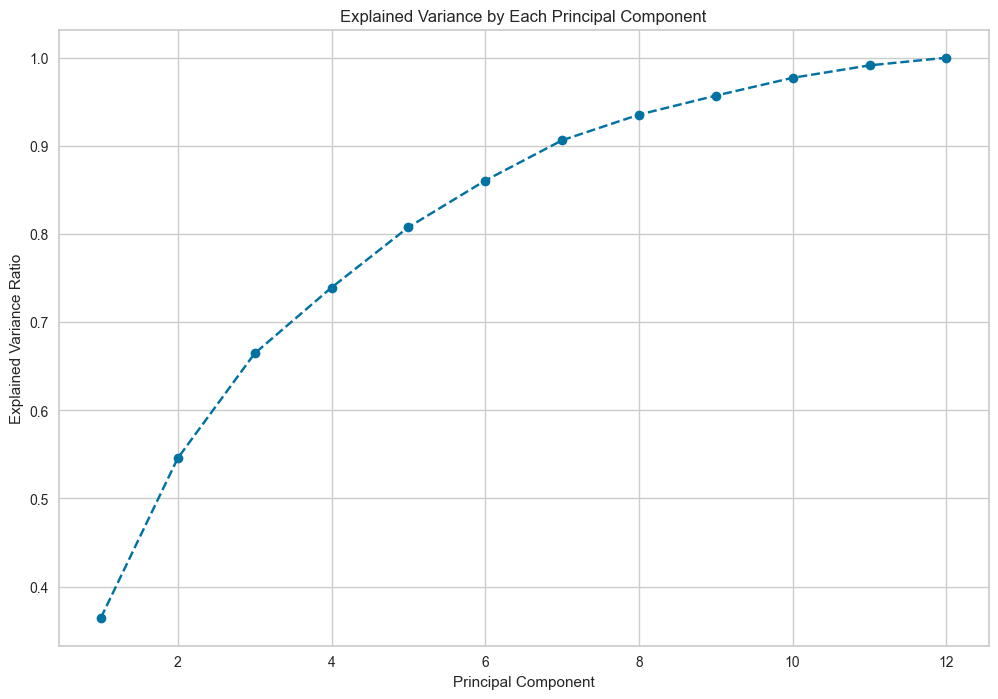

In [ ]:
# Calculate covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors based on eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Retain the top 10 principal components
num_components = 10
top_eigenvectors = eigenvectors[:, :num_components]

# Project the data onto the reduced-dimensional space
X_pca = X_standardized.dot(top_eigenvectors)

# Display the reduced data
reduced_data = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(num_components)])
print("Reduced Data:")
print(reduced_data.head())

# Plot the explained variance by each component
explained_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

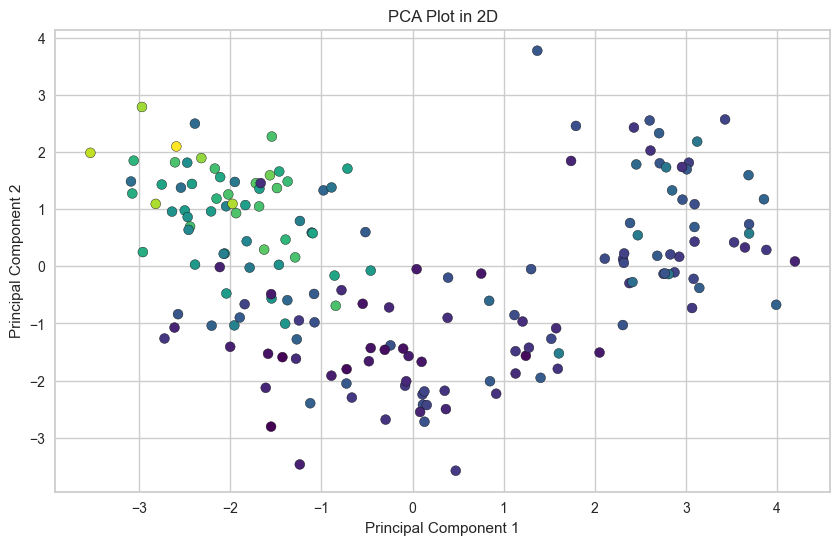

In [ ]:
# Apply PCA
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_standardized)

# Plot the data points in 2D using their first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('PCA Plot in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def custom_pca_with_minmax_scaler(data,n_components):
    # Step 1: Scale the data using MinMaxScaler
    scaler = MinMaxScaler()
    data_minmax_scaled = scaler.fit_transform(data)
    
    # Step 2: Compute the covariance matrix
    covariance_matrix = np.cov(data_minmax_scaled, rowvar=False)
    
    # Step 3: Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 4: Sort eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    sorted_eigenvalues = eigenvalues[idx][:n_components]
    sorted_eigenvectors = eigenvectors[:, idx][:, :n_components]
    
    
    # Step 5: Choose the number of components based on the explained variance ratio
    total_variance = np.sum(sorted_eigenvalues)
    explained_variance_ratio = sorted_eigenvalues / total_variance
    cum_explained_variance_ratio = np.cumsum(explained_variance_ratio)
    n_components = np.argmax(cum_explained_variance_ratio >= 0.95) + 1
    
    # Step 6: Choose the top n_components eigenvectors
    top_eigenvectors = sorted_eigenvectors[:, :n_components]
    
    # Step 7: Project the data onto the new feature space
    projected_data = np.dot(data_minmax_scaled, top_eigenvectors)
    
    return projected_data, explained_variance_ratio[:n_components]


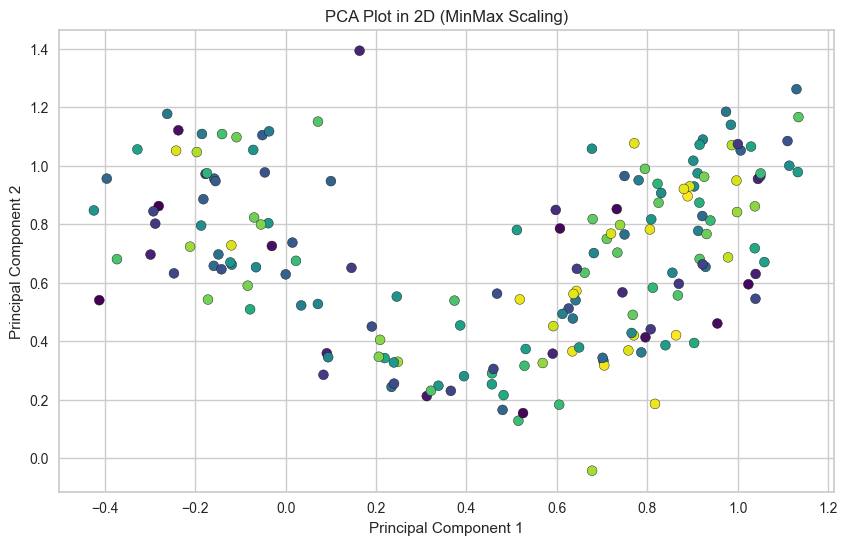

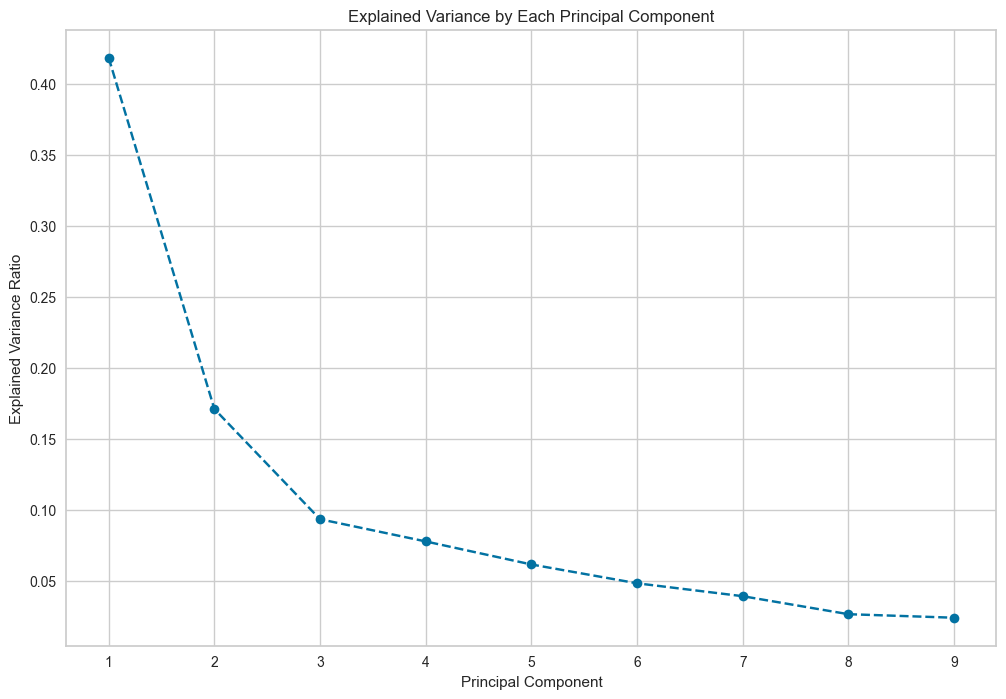

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_minmax_scaled = scaler.fit_transform(X)

# Call the custom function
projected_data, explained_variance_ratio = custom_pca_with_minmax_scaler(X_minmax_scaled,12)

# Generate random colors for the scatter plot
c = np.random.rand(len(X))

# Plot the data points in 2D using their first two principal components with MinMax Scaling
plt.figure(figsize=(10, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=c, cmap='viridis', edgecolors='k', s=50)
plt.title('PCA Plot in 2D (MinMax Scaling)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plot the explained variance by each component
plt.figure(figsize=(12, 8))
plt.plot(range(1, projected_data.shape[1] + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

### Opinion on Differences:

The main difference between StandardScaler and MinMaxScaler is the scaling method. StandardScaler scales the features to have zero mean and unit variance, while MinMaxScaler scales the features to a specified range, usually between 0 and 1.

After applying PCA with MinMax Scaling, the resulting principal components may have different values and distributions compared to those obtained with Standard Scaling. The choice between these scaling methods depends on the characteristics of your data and the requirements of your analysis.

If you observe differences in the PCA plots between the two scaling methods, it suggests that the scaling method impacts the distribution and relationships of the data points in the reduced-dimensional space.

### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

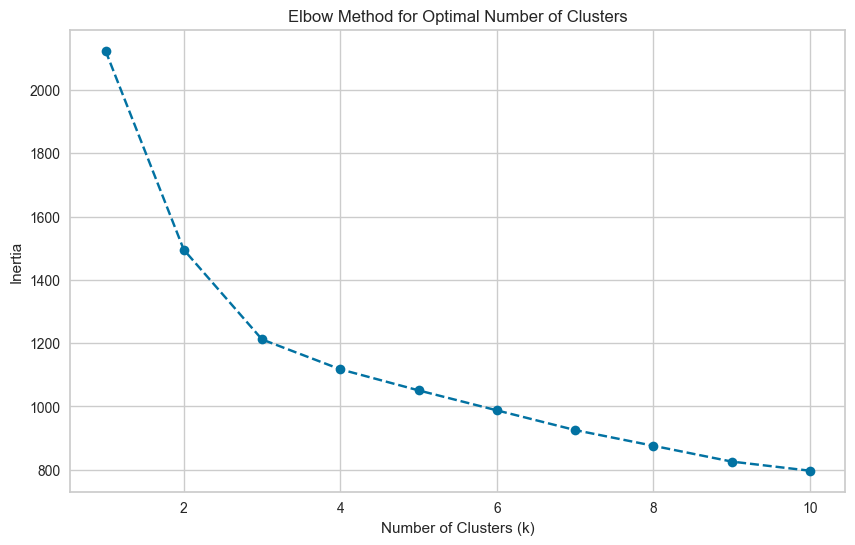

In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia_values = []
max_clusters = 10  # You can adjust the maximum number of clusters as needed

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_standardized)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


 As we know the "elbow" in the plot represents a point where the rate of decrease in inertia slows down, indicating a good choice for the number of clusters.
 Based on the plot we observe that 9  as an elbow point is a good estimate for the optimal number of clusters.

What is inertia and silhouette metrics?
Explain them briefly.




Inertia and silhouette are metrics commonly used to evaluate the performance of clustering algorithms, such as KMeans.

## Inertia:
### Definition:
Inertia, also known as the sum of squared distances, measures the compactness of the clusters. It is calculated as the sum of the squared distances between each data point and its assigned cluster's centroid. The goal of clustering is to minimize inertia.

### Interpretation:
Lower inertia values indicate more compact and tightly knit clusters.
Inertia tends to decrease as the number of clusters increases. However, it becomes less meaningful when the number of clusters is very high.

### Usage:
Inertia is often used in the elbow method to determine the optimal number of clusters. The point where the rate of decrease in inertia slows down (forming an "elbow" in the plot) is considered a good choice for the number of clusters.

## Silhouette Score:
### Definition:
Silhouette score measures how well-separated the clusters are. It quantifies the goodness of a clustering technique by assigning a score to each data point based on the average distance to the points in its own cluster compared to the average distance to points in the nearest neighboring cluster.

### Interpretation:
Silhouette score ranges from -1 to 1.
A high silhouette score indicates well-defined clusters with data points close to their own cluster and far from other clusters.
A score near 0 suggests overlapping clusters, and negative scores indicate that data points might have been assigned to the wrong cluster.

### Usage:
Silhouette score is used to assess the quality of a clustering solution.
A higher silhouette score suggests a better-defined and more appropriate clustering.

## Comparison:
Inertia focuses on the compactness of clusters.
Silhouette score considers both the compactness and separation of clusters.

It's common to use a combination of inertia and silhouette score, along with visual inspection, to evaluate the effectiveness of clustering algorithms and choose the optimal number of clusters.

In [ ]:
# Apply PCA with Standard Scaling
pca_std = PCA()
X_pca_std = pca_std.fit_transform(X_standardized)

# Save the final datapoints in pca_std_datapoint
pca_std_datapoint = pd.DataFrame(X_pca_std, columns=[f'PC{i+1}' for i in range(X_pca_std.shape[1])])

# Display the reduced data
print("PCA Standardized Datapoints:")
print(pca_std_datapoint.head())


PCA Standardized Datapoints:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.044033 -0.474833 -1.942162  0.125395 -0.326308 -0.974140  0.167909   
1 -2.151467  1.184811  0.875582 -0.789455  0.291156  0.729913  0.287116   
2 -2.969985  2.790077 -0.438829 -0.554159 -0.078578  0.080687 -0.379161   
3 -0.977506  1.330258  1.848480  0.544062 -0.041558 -0.474795  0.559177   
4 -2.318522  1.895396 -0.703853  0.141342 -0.813266  0.084327  0.436359   

        PC8       PC9      PC10      PC11      PC12  
0 -1.035192 -0.211525  0.261967  0.402782  0.001808  
1  0.183143 -0.923214  0.421181  0.041559  0.012759  
2 -0.678312  0.635855 -0.103185 -0.155196 -0.383223  
3 -0.318972 -0.107092  0.137456 -0.265950 -0.071221  
4 -0.419396  0.118817 -0.202649 -0.322501  0.133564  


In [ ]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 29.19it/s]


In [ ]:
silhouette = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette.append(sil(pca_std_datapoint, kmeans.labels_, metric='euclidean'))

100%|██████████| 8/8 [00:00<00:00, 36.16it/s]


Plot the **inertia** and **silhouette ** values

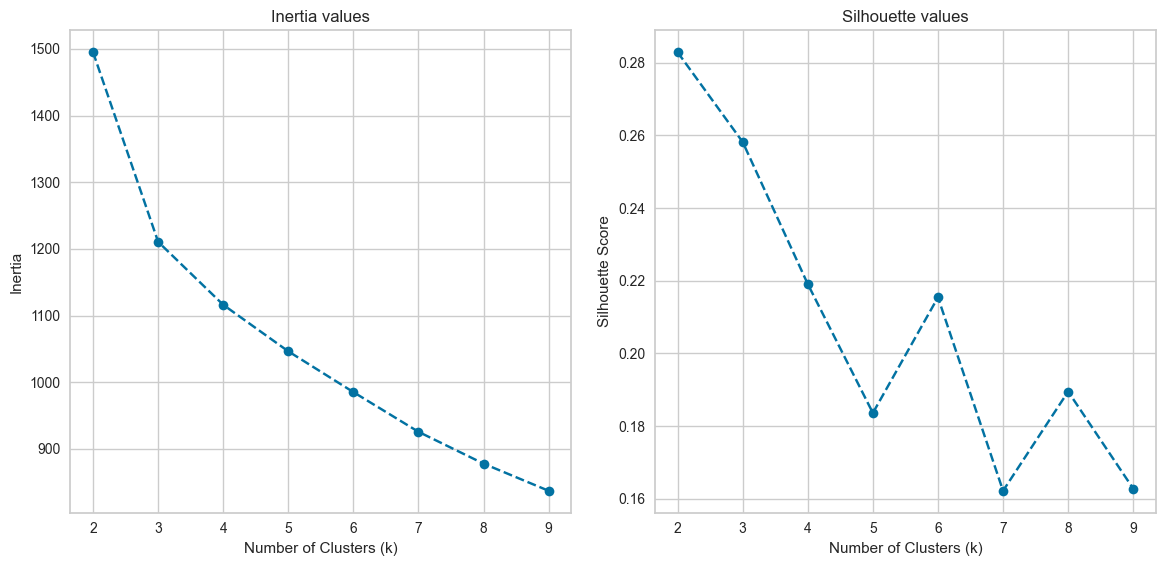

In [ ]:
# Plot the inertia values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, marker='o', linestyle='--')
plt.title('Inertia values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

# Plot the silhouette values
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette, marker='o', linestyle='--')
plt.title('Silhouette values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()


Tune the hyper parameters based on your conclusions.

In [ ]:
model_kmeans = KMeans(n_clusters=9, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#Now plot the datapoints usig two first features
(Each cluster in a different colour)

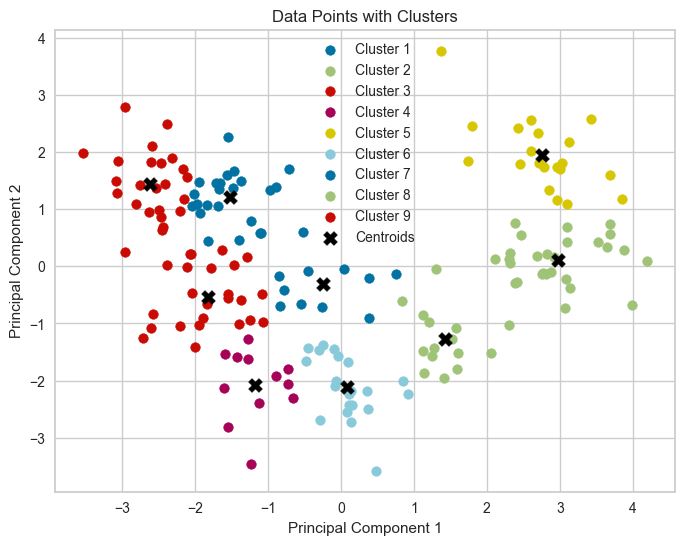

In [ ]:
# Load the data from CSV (replace 'Datapoint.csv' with your actual CSV file)
datapoint = pd.read_csv('Datapoint.csv')

# Extract features and target variable (if applicable)
X = datapoint.iloc[:, :-1].values  # Features
y = datapoint.iloc[:, -1].values    # Target variable (if applicable)

# Standardize the features using Standard Scaler
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA with Standard Scaling
pca_std = PCA(n_components=2)
X_pca_std = pca_std.fit_transform(X_standardized)

# Convert to NumPy array for clustering
pca_std_datapoint = np.array(X_pca_std)

# Apply KMeans clustering with 9 clusters
kmeans = KMeans(n_clusters=9, init='k-means++', n_init=15, max_iter=500, random_state=17)
kmeans.fit(pca_std_datapoint)

# Plot the data points with each cluster in a different color
plt.figure(figsize=(8, 6))
for cluster in range(9):
    plt.scatter(X_pca_std[kmeans.labels_ == cluster, 0],
                X_pca_std[kmeans.labels_ == cluster, 1],
                label=f'Cluster {cluster + 1}')

# Plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='X', s=100, color='black', label='Centroids')

plt.title('Data Points with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Do all previous steps for MinMax scaled data points.





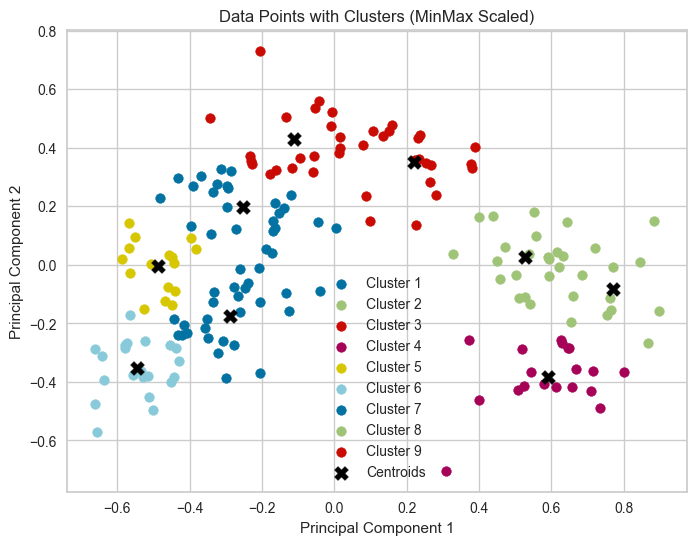

In [ ]:
# Load the data from CSV (replace 'Datapoint.csv' with your actual CSV file)
datapoint = pd.read_csv('Datapoint.csv')

# Extract features and target variable (if applicable)
X = datapoint.iloc[:, :-1].values  # Features
y = datapoint.iloc[:, -1].values    # Target variable (if applicable)

# Apply MinMax Scaling
X_minmax_scaled = MinMaxScaler().fit_transform(X)

# Apply PCA with MinMax Scaling
pca_minmax = PCA(n_components=2)
X_pca_minmax = pca_minmax.fit_transform(X_minmax_scaled)

# Convert to NumPy array for clustering
pca_minmax_datapoint = np.array(X_pca_minmax)

# Apply KMeans clustering with 9 clusters
kmeans_minmax = KMeans(n_clusters=9, init='k-means++', n_init=15, max_iter=500, random_state=17)
kmeans_minmax.fit(pca_minmax_datapoint)

# Plot the data points with each cluster in a different color (MinMax scaled)
plt.figure(figsize=(8, 6))
for cluster in range(9):
    plt.scatter(X_pca_minmax[kmeans_minmax.labels_ == cluster, 0],
                X_pca_minmax[kmeans_minmax.labels_ == cluster, 1],
                label=f'Cluster {cluster + 1}')

# Plot cluster centroids
plt.scatter(kmeans_minmax.cluster_centers_[:, 0], kmeans_minmax.cluster_centers_[:, 1],
            marker='X', s=100, color='black', label='Centroids')

plt.title('Data Points with Clusters (MinMax Scaled)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Compare the results of different scaling methods in a PCA problem

### Scale of Principal Components
The scaling method used significantly impacts the scale of the principal components. Standard Scaler widens the range due to its consideration of standard deviation, while Min-Max Scaler compresses the range to
### Inertia
Inertia values are affected by the scaling method. Standard Scaler's inertia reflects the variance within clusters relative to the standard deviation of each feature, while Min-Max Scaler's inertia reflects the variance within clusters relative to the range of each feature.
### Silhouette
The silhouette score is influenced by the scaling method. Standard Scaler ensures that each feature contributes equally to the distance computations, while Min-Max Scaler transforms features to a fixed range, causing all features to contribute equally to the distance calculations.
### Variance Explained
The explained variance plot demonstrates how much of the total variance in the data is captured by the principal components. The cumulative explained variance by the principal components is a key metric for comparison.
### Outlier Sensitivity
Standard Scaler is sensitive to outliers due to its reliance on the mean and standard deviation, while Min-Max Scaler is less sensitive to outliers in terms of the scaling effect.
### Interpretation of Axes
The interpretation of the axes differs between the two scaling methods. With Standard Scaler, the axes are in terms of standard deviations away from the mean, while with Min-Max Scaler, the axes are in terms of the proportion between the min and max of the dataset.
In summary, the choice of scaling method significantly impacts the results of PCA, and it's essential to consider the specific characteristics of the data and the objectives of the analysis when selecting the most appropriate scaling method.